# Introduction 

Hi, fellas! Professionals like us, who research, analyse or develop in the world of Data Science, understand the immense value of Data Visualization. If we think about the process of any project, we are evidently going to realise that, charts, graphs and plots are the backbone of our work. The first step of any project we work on is Exploratory Data Analysis, which revolves around visualization to get insights and patterns within the data. Likewise, at the conclusion of the project, we compare the performances of different models with different visualization techniques. We often use plots to track the values of key metrics, such as accuracy or loss, across different stages of the training process. Similarly, if we consider Deep Learning, we monitor the performance of the models on both training and validation sets with plots. So, in the field of Data Science, Data Visualization is an important aspect, which serves as a critical tool for gaining insights, communicating findings, and ultimately driving successful outcomes. 

*“Graphical excellence is that which gives the viewer the greatest number of ideas in the shortest time with the least ink in the smallest space.” - **Edward Tufte***

# Existing Libraries 

Python has multiple options to perform Data Visualization with the widely available open-source libraries. If you are a beginner, you surely have learnt and used Matplotlib and Seaborn. Even we can create plots with Pandas also. 

In [1]:
import pandas as pd
import numpy as np

pd.DataFrame(
    np.random.rand(100),
    columns=['Generated Rnadom Numbers']
).plot(
    kind='line',
    title='Plotting with Pandas',
    xlabel='X-axis Title',
    ylabel='Y-axis Title',
    legend=False
)

ModuleNotFoundError: No module named 'pandas'

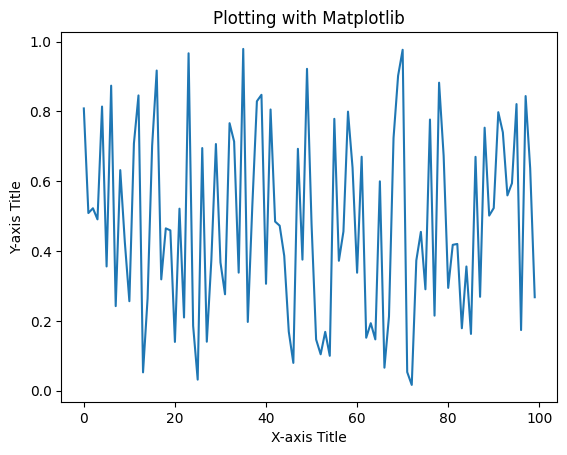

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_points = np.random.rand(100)
plt.plot(y_points)
plt.title('Plotting with Matplotlib')
plt.xlabel('X-axis Title')
plt.ylabel('Y-axis Title')
plt.show()

[Text(0.5, 1.0, 'Plotting with Seaborn'),
 Text(0.5, 0, 'X-axis Title'),
 Text(0, 0.5, 'Y-axis Title')]

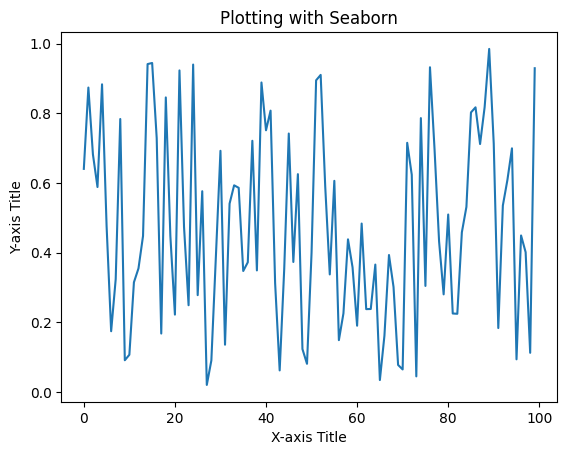

In [ ]:
import numpy as np
import seaborn as sns

y_points = np.random.rand(100)
sns.lineplot(
    y_points
).set(
    title='Plotting with Seaborn', 
    xlabel='X-axis Title', 
    ylabel='Y-axis Title'
)

From the above visualizations it is clear that, Pandas plotting and Seaborn are built on top of Matplotlib, and hence use the same backend for creating plots. This means that any customization or modification we can do with Matplotlib can also be applied to plots created with Pandas plotting or Seaborn. Also, these three libraries are easy to integrate with other Python libraries.

But as I have already pointed out earlier that, these libraries are for beiginners and can be helpful in times of urgent requirements as they are easy to use. But what if, someone wants to move up from the beginner level and deliver more professional charts for client requirements in short time? 

**Altair** is one the best choices to go for!

# Short intoduction to Altair

[Altair](https://altair-viz.github.io/) is a declarative statistical visualization library built on top of [Vega](https://vega.github.io/vega/) and [Vega-Lite](https://vega.github.io/vega-lite/) grammar. The main advantage of Altair is its simple, user-friendly and consistent API. As Altair is declarative in nature, it saves time for the user to explore the data in more advanced way. With Altair, the user only has to declare the links beween data columns and visual encoding channels, such as the x-axis and y-axis, while the others are handled automatically. Alike Matplotlib and Seaborn, Altair also supports wide range of charts, from simple to sophisticated, which can be created using a concise grammar.

Let's hop in!

Install Altair with `pip install altair` (I am using the version 4.2.2 for this blog). You can also install *vega-datasets* with `pip install vega-datasets` and I am going to use the datasets available with *vega-datasets* to explore Altair.

In [ ]:
import pandas as pd
from vega_datasets import local_data

df = local_data.iowa_electricity()
pd.DataFrame(df.source.value_counts())

,count
source,
Fossil Fuels,17
Nuclear Energy,17
Renewables,17


Now let us visualize the above information about the feature *source* with Altair.

In [ ]:
import altair as alt

chart = alt.Chart(
            data=df,
            mark='bar',
            title='Count Plot',
            width=300,
            height=300
        ).encode(
            x='source',
            y='count(source)'
        )
chart

alt.Chart(...)

Let's discuss about the above code for the Count plot. For any plot in Altair, we have to pass the dataframe which is passed to the parameter *data* in the `Chart` object. The next important parameter in the `Chart` object is *mark*, which is used to describe the chart type. As here I have created a bar-plot, so I have used `mark = bar`. An alternative process is to declare as `alt.Chart(data=df, ...).mark_bar().encoding(...)`. The parameters *title*, *width* and *height* are used to declare the chart title and the figsize of the chart area.

Altair uses the `encode()` method, which builds a key-value mapping between various encoding channels like `x`, to specify the x-axis values and `y`, to specify the y-axis values, which are accessed by column names. Visit [here](https://altair-viz.github.io/user_guide/encodings/channel_options.html#user-guide-encoding-channel-options) to know about the other parameters which can be passed to the `encode()` method.

The `count()` function used here is an `Aggregate` function. Altair supports several such `Aggregate` functions like  max, min, mean, variance and others, which are listed [here](https://altair-viz.github.io/user_guide/encodings/index.html#encoding-aggregates).

To sum up, we do not have to create a separate dataframe and use that to create the count plot. Even the x-axis labels and y-axis labels are handled by Altair.

We can customise the above plot with more declarations as shown below.

In [ ]:
import altair as alt

chart = alt.Chart(
            data=df,title=alt.TitleParams(text='Sources of Energy',fontSize=30,subtitle='Count Plot',subtitleFontSize=25),width=500,height=500
        ).mark_bar(
            width=50,color='#f58518',cornerRadiusTopLeft=5,cornerRadiusTopRight=5
        ).encode(
            x=alt.X(shorthand='source', type='nominal', title='Sources of Energy', axis=alt.Axis(grid=False,labelAngle=0,labelFontSize=15,titleFontSize=20)),
            y=alt.Y(shorthand='source', type='nominal', aggregate='count', title='Count of Records', axis=alt.Axis(grid=False,labelFontSize=15,titleFontSize=20))
        )
chart.configure_view(strokeWidth=0)

alt.Chart(...)

Clearly, Altair is declarative as an user will need. You can customise the plot easily to make it more presentable with very selective parameters.

We can also create interesting plots with Altair. 

In [ ]:
df = local_data.barley()

sticks = alt.Chart(
            df, title=alt.TitleParams(text='Distribution of "yield" based on the "variety" of Barley',fontSize=30,subtitle='Sticks and Balls Chart',subtitleFontSize=25),
            width=500,height=500
        ).mark_bar(
            height=8,color='#d95f02',cornerRadius=50
        ).encode(
            x=alt.X(shorthand='yield', type='quantitative', aggregate='min', axis=alt.Axis(grid=False)),
            x2=alt.X2(shorthand='yield', aggregate='max'),
            y=alt.Y(shorthand='variety', type='nominal'),
            tooltip=[
                alt.Tooltip(shorthand='variety', type='nominal'),
                alt.Tooltip(shorthand='yield', type='quantitative', aggregate='min', title='Minimum Yield'),
                alt.Tooltip(shorthand='yield', type='quantitative', aggregate='max', title='Maximum Yield')
            ]
        )

balls = alt.Chart(df).mark_circle(size=240, color="#6a3d9a").encode(
            x=alt.X(shorthand='yield', type='quantitative', aggregate='median', title='Distribution of Yield', axis=alt.Axis(grid=False,labelFontSize=15,titleFontSize=20)),
            y=alt.Y(shorthand='variety', type='nominal', title='Variety of Barley', axis=alt.Axis(grid=False,labelFontSize=15,titleFontSize=20)),
            tooltip=[
                alt.Tooltip(shorthand='variety', type='nominal', title='Variety'),
                alt.Tooltip(shorthand='yield', type='quantitative', aggregate='median', title='Median Yield'),
            ]
        )
(sticks+balls).configure_view(strokeWidth=0)

alt.LayerChart(...)

The plot above shown is a *Sticks and Balls Chart*. The chart has been divided into two sections- `sticks` and `balls`. The sticks extend from Minimum yield to the Maximum yield for different varieties of barley. The two end points of the sticks are controlled by `alt.X` and `alt.X2` with the *aggregate* functions `min` and `max`. Balls in the chart represent Median of the yields for different varieties of barley. Altair provides a suitable and easy way to combine the two kind of charts with a `+` operator.

Creating subplots with Altair are also time saving.

In [ ]:
df = local_data.ohlc()

open = alt.Chart(
            df, title=alt.TitleParams(text='Open prices',fontSize=30)
        ).mark_line(
            color="#66a61e",strokeWidth=4, point={'size':50, 'color':'#b15928'}
        ).encode(
            x=alt.X(shorthand='date', type='temporal', title='Date', axis=alt.Axis(grid=False,labelAngle=-90,labelFontSize=15,titleFontSize=20)),
            y=alt.Y(shorthand='open', type='quantitative', title='Price', axis=alt.Axis(grid=False,labelFontSize=15,titleFontSize=20)),
            tooltip=[
                alt.Tooltip(shorthand='date', type='temporal', title='Date'),
                alt.Tooltip(shorthand='open', type='quantitative', title='Price')
            ]
        ).interactive()

close = alt.Chart(
            df, title=alt.TitleParams(text='Close prices',fontSize=30)
        ).mark_line(
            color="#33a02c",strokeWidth=4, point={'size':50, 'color':'#a65628'}
        ).encode(
            x=alt.X(shorthand='date', type='temporal', title='Date', axis=alt.Axis(grid=False,labelAngle=-90,labelFontSize=15,titleFontSize=20)),
            y=alt.Y(shorthand='close', type='quantitative', title='Open Price', axis=alt.Axis(grid=False,labelFontSize=15,titleFontSize=20)),
            tooltip=[
                alt.Tooltip(shorthand='date', type='temporal', title='Date'),
                alt.Tooltip(shorthand='close', type='quantitative', title='Price')
            ]
        ).interactive()

(open|close).configure_view(strokeWidth=0)

alt.HConcatChart(...)

In [ ]:
low = alt.Chart(
            df, title=alt.TitleParams(text='Low prices',fontSize=30)
        ).mark_line(
            color="#66a61e",strokeWidth=4, point={'size':50, 'color':'#b15928'}
        ).encode(
            x=alt.X(shorthand='date', type='temporal', title='Date', axis=alt.Axis(grid=False,labelAngle=-90,labelFontSize=15,titleFontSize=20)),
            y=alt.Y(shorthand='low', type='quantitative', title='Price', axis=alt.Axis(grid=False,labelFontSize=15,titleFontSize=20)),
            tooltip=[
                alt.Tooltip(shorthand='date', type='temporal', title='Date'),
                alt.Tooltip(shorthand='low', type='quantitative', title='Price')
            ]
        ).interactive()

high = alt.Chart(
            df, title=alt.TitleParams(text='High prices',fontSize=30)
        ).mark_line(
            color="#66a61e",strokeWidth=4, point={'size':50, 'color':'#b15928'}
        ).encode(
            x=alt.X(shorthand='date', type='temporal', title='Date', axis=alt.Axis(grid=False,labelAngle=-90,labelFontSize=15,titleFontSize=20)),
            y=alt.Y(shorthand='high', type='quantitative', title='Price', axis=alt.Axis(grid=False,labelFontSize=15,titleFontSize=20)),
            tooltip=[
                alt.Tooltip(shorthand='date', type='temporal', title='Date'),
                alt.Tooltip(shorthand='high', type='quantitative', title='Price')
            ]
        ).interactive()

(open|close) & (high|low)

alt.VConcatChart(...)